# import

In [1]:
import numpy as np
import pandas as pd
import mdptoolbox
import time as time
import itertools
import csv
import pdb

# Execute main functions

In [2]:
#read main functions 

#Transition Probability Matrix
transProb=open(r"E:\one-Drive\OneDrive - Auburn University\Auburn University\RA\GMS\8-First Contribution\Main Codes\Transition Probability Matrix.py",encoding="utf8")
read_transProb=transProb.read()
exec(read_transProb)

#Rewards
Rewards=open(r"E:\one-Drive\OneDrive - Auburn University\Auburn University\RA\GMS\8-First Contribution\Main Codes\Rewards.py",encoding="utf8")
read_Rewards= Rewards.read()
exec(read_Rewards)

#Find Optimal Policies
FOP=open(r"E:\one-Drive\OneDrive - Auburn University\Auburn University\RA\GMS\8-First Contribution\Main Codes\Find Optimal Policies.py",encoding="utf8")
read_FOP= FOP.read()
exec(read_FOP)

#Make a dictionary of all combinations and strategies
MDCS=open(r"E:\one-Drive\OneDrive - Auburn University\Auburn University\RA\GMS\8-First Contribution\Main Codes\Make a dictionary of all combinations and strategies.py",encoding="utf8")
read_MDCS= MDCS.read()
exec(read_MDCS)

# DOE

In [3]:
#range for z1, z2
range_z1=np.array(np.arange(0,1,0.01),dtype=np.longdouble) #longdouble for using small numbers after decimal points
range_z2=np.array(np.arange(0,1,0.01),dtype=np.longdouble) #the last point is (0.99,0.99)

#round
range_z1=np.round(range_z1,2)
range_z2=np.round(range_z2,2)

In [4]:
def doe_bothZ(keys1, keys2):

    #make a dictionary
    value=[]

  
    #make a list which contains combination of z1 and z2
    comb_A_B=list(itertools.product(keys1,keys2))
    keep_numbers_A_B=dict.fromkeys(comb_A_B,value)  #keep numbers for all cobnations of z1 and z2
    General_keys1= keep_numbers_A_B.keys()
    General_keys=list(General_keys1)
    #for loop
    for k in General_keys:
        z1=k[0] 
        z2=k[1]
        
        #Transition Probability MAtrix
        P=newTransProb(z1=k[0],z2=k[1])# #do not forget to put z1=k[0],z2=k[1] in th function  
        transitions=P.reshape(5,19,19)   #reshape the transtion probability matrix to (A,S,S)
        
        
        R=rewards()   #rewards
        reward=R.reshape(19,5)
        # Total cost use policy iteration method
           
        pi=mdptoolbox.mdp.PolicyIteration(transitions, reward, discount=0.9999, policy0=None, max_iter=10000, eval_type=0)
        #pi=mdptoolbox.mdp.ValueIteration(transitions, reward, discount, max_iter=10000)
        #run the  Policy iteration
        pi.run() 

        total_cost=pi.V
        rounded_total_cost=round(total_cost[0],2)
        #put all optimal Policies for Policy Iteration
        policy=pi.policy
        result=[]
        
        #values
        #result.append(rounded_total_cost)
        result.append(policy)
        #put all total costs and policies as values in dictionary
        keep_numbers_A_B[k]=result     #do not use append and extend here


    return keep_numbers_A_B

In [5]:
dbz=doe_bothZ(range_z1, range_z2)    #assign a sspecific variable to this experiment

# Find Optimal Policies

In [6]:
#it calls the function from Main Functions script
fuop=dbz  #fuop is a constant name for a variable which gets the experiments
opt_dict1=find_optimal_policies(fuop)   #the input is Fuop output is opt_dict
#opt_dict1

# Make a dictionary of all combinations and strategies

In [7]:
##it calls the function from Main Functions script
dict_NGBS1=make_dict_comb_stra(fuop,opt_dict1)  
#dict_NGBS1

# Strategies and Combinations in a dataframe

In [8]:
# convvert dict_NBGS to list 

list_NBGS=list(dict_NGBS1.items())

#seperate lists
z1=[]
z2=[]
insp_stra=[]
for i in range(len(list_NBGS)):
    z1.append(list_NBGS[i][0][0])
    z2.append(list_NBGS[i][0][1])
    insp_stra.append(list_NBGS[i][1])


# make a dataframe from NBGS
dt_NBGS=pd.DataFrame(list(zip(z1,z2,insp_stra)),columns=["$z_1$","$z_2$",'Inspection Strategy'])
#show all combination and corresponding optimal policy in one table
pd.set_option('max_columns', None)  #show all columns
pd.set_option('max_rows', None)     #show all rows

#dt_NBGS

# Plot

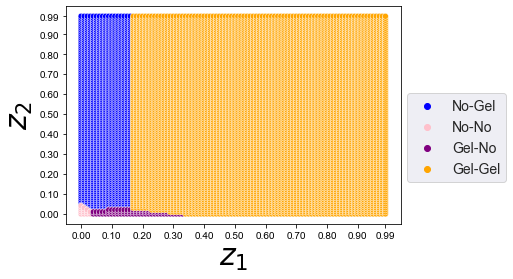

In [9]:
#scatterplot
import seaborn as sns
import matplotlib.pyplot as plt

#palette=['black','white','gray','silver']


ax=sns.scatterplot(data=dt_NBGS, x="$z_1$", y="$z_2$", hue='Inspection Strategy',
                   palette={"No-Gel":  "blue", "No-No"  : "pink",  "Gel-No" :   "purple" , 
                            "Gel-Gel" : "orange", "No-Bio" :   "green" , "Bio-Gel" :  "black", 
                           "Bio-Bio" :  "silver", "Bio-No" :   "red","Seq-No" :  "white",
                            "Gel-Bio": "brown"})

#plt.ylim(0, 1)
plt.xlabel("$z_1$", size=30)  #change the size of x label
plt.ylabel("$z_2$", size=30)  #change the size of y label
sns.set(rc = {'figure.figsize':(17,17)})    #change size of figure 
plt.legend(bbox_to_anchor=(1.02, 0.6), loc='upper left', borderaxespad=0,fontsize=14)  #control legend

import matplotlib.ticker as ticker
#setting the x and y labels
values=[0,.1,.2,.3,.4,.5,.6,.7,.8,.9,.99]
plt.xticks(values)                               #to set labels
plt.yticks(values)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(0.1))    # to set intervals
#ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))

#change the scale of plot ( chnage numbers on x and y)
sns.set_context("talk")  


In [ ]:
from matplotlib import pyplot as plt

ax.savefig('E:/one-Drive/OneDrive - Auburn University/Auburn University/RA/GMS/Reports/Phase9- DOE/Gel-alpha&beta/foo.png')


In [3]:
plt.show()